# PART 1 : 
# DOMAIN: Automobile

## CONTEXT: 
The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5
continuous attributes

## DATA DESCRIPTION: 

The data concerns city-cycle fuel consumption in miles per gallon

• Attribute Information:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

## PROJECT OBJECTIVE: 
Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’

## 1. Import and warehouse data:

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# Importing Data files
data1 = pd.read_csv('Part1 - Car name.csv')
data2 = pd.read_json('Part1 - Car-Attributes.json')

# explore shape and size of each
print(data1.size,data1.shape)
print(data2.size,data2.shape)

398 (398, 1)
3184 (398, 8)


In [2]:
# Merge all datasets into one
Automobile_data=pd.concat([data1,data2],axis=1,sort=False)

# explore final shape and size
print(Automobile_data.size,Automobile_data.shape)

Automobile_data.head(10)

3582 (398, 9)


car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1
5           ford galaxie 500  15.0    8  429.0  198  4341  10.0  70       1
6           chevrolet impala  14.0    8  454.0  220  4354   9.0  70       1
7          plymouth fury iii  14.0    8  440.0  215  4312   8.5  70       1
8           pontiac catalina  14.0    8  455.0  225  4425  10.0  70       1
9         amc ambassador dpl  15.0    8  390.0  190  3850   8.5  70       1

In [3]:
# Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use
Automobile_data.to_csv('Automobile_data.csv',index=True)
Automobile_data.to_excel('Automobile_data.xlsx',index=True,sheet_name='first sheet')
Automobile_data.to_json('Automobile_data.json', orient='records')

# Import the data from above steps into python.
Auto_data = pd.read_csv('Automobile_data.csv',index_col=0)

Auto_data.head(10)

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1
5           ford galaxie 500  15.0    8  429.0  198  4341  10.0  70       1
6           chevrolet impala  14.0    8  454.0  220  4354   9.0  70       1
7          plymouth fury iii  14.0    8  440.0  215  4312   8.5  70       1
8           pontiac catalina  14.0    8  455.0  225  4425  10.0  70       1
9         amc ambassador dpl  15.0    8  390.0  190  3850   8.5  70       1

## 2. Data cleansing: 

In [4]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(Auto_data.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
Auto_data[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false

car_name   mpg  cyl   disp hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0  ?  2046  19.0  71       1
126         ford maverick  21.0    6  200.0  ?  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0  ?  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0  ?  2905  14.3  80       1
354           renault 18i  34.5    4  100.0  ?  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0  ?  3035  20.5  82       1

There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations. Here, we will replace them with their median values. First replace '?' with NaN and then replace NaN with median

In [5]:
Auto_data1 = Auto_data.replace('?', np.nan)
Auto_data1[hpIsDigit['hp'] == False] 

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0  NaN  2046  19.0  71       1
126         ford maverick  21.0    6  200.0  NaN  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0  NaN  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0  NaN  2905  14.3  80       1
354           renault 18i  34.5    4  100.0  NaN  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0  NaN  3035  20.5  82       1

In [6]:
#instead of dropping the rows, lets replace the missing values with median value. 
Auto_data1.median()

mpg         23.0
cyl          4.0
disp       148.5
hp          93.5
wt        2803.5
acc         15.5
yr          76.0
origin       1.0
dtype: float64

In [7]:
#dropping/ignoring car_name  and origin
Auto_data1 = Auto_data1.drop(['car_name','origin'], axis=1)
Auto_data1.head()

mpg  cyl   disp   hp    wt   acc  yr
0  18.0    8  307.0  130  3504  12.0  70
1  15.0    8  350.0  165  3693  11.5  70
2  18.0    8  318.0  150  3436  11.0  70
3  16.0    8  304.0  150  3433  12.0  70
4  17.0    8  302.0  140  3449  10.5  70

In [8]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)


medianFiller = lambda x: x.fillna(x.median())
Auto_data1 = Auto_data1.apply(medianFiller,axis=0)

Auto_data1['hp'] = Auto_data1['hp'].astype('float64')  # converting the hp column from object / string type to float
Auto_data1.head()

mpg  cyl   disp     hp    wt   acc  yr
0  18.0    8  307.0  130.0  3504  12.0  70
1  15.0    8  350.0  165.0  3693  11.5  70
2  18.0    8  318.0  150.0  3436  11.0  70
3  16.0    8  304.0  150.0  3433  12.0  70
4  17.0    8  302.0  140.0  3449  10.5  70

## 3. Data analysis & visualisation:

In [9]:
Auto_data1.describe()

mpg         cyl        disp          hp           wt  \
count  398.000000  398.000000  398.000000  398.000000   398.000000   
mean    23.514573    5.454774  193.425879  104.304020  2970.424623   
std      7.815984    1.701004  104.269838   38.222625   846.841774   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.500000    4.000000  104.250000   76.000000  2223.750000   
50%     23.000000    4.000000  148.500000   93.500000  2803.500000   
75%     29.000000    8.000000  262.000000  125.000000  3608.000000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

              acc          yr  
count  398.000000  398.000000  
mean    15.568090   76.010050  
std      2.757689    3.697627  
min      8.000000   70.000000  
25%     13.825000   73.000000  
50%     15.500000   76.000000  
75%     17.175000   79.000000  
max     24.800000   82.000000

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Univariate Analysis

C:\Users\Roshan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

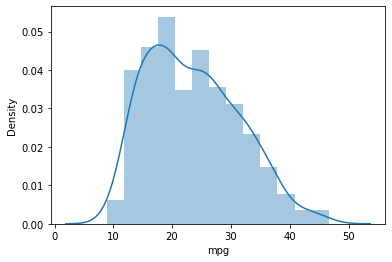

In [10]:
sns.distplot(Auto_data1['mpg'])

(array([  4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 204.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  84.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 103.]),
 array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
        4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ]),
 <BarContainer object of 50 artists>)

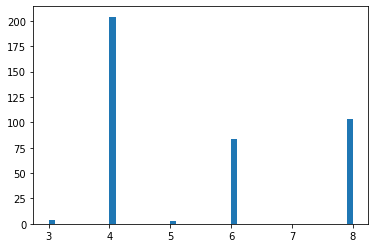

In [11]:
plt.hist(Auto_data1['cyl'], bins=50)

C:\Users\Roshan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hp', ylabel='Density'>

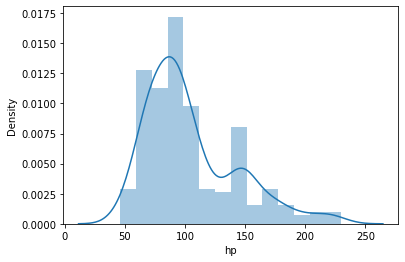

In [12]:
sns.distplot(Auto_data1['hp'])

C:\Users\Roshan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acc', ylabel='Density'>

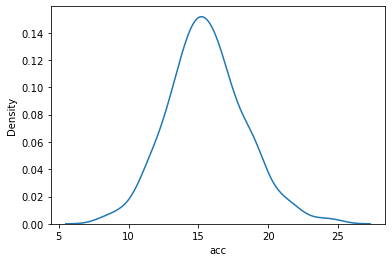

In [13]:
sns.distplot(Auto_data1['acc'], hist=False)

C:\Users\Roshan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yr', ylabel='Density'>

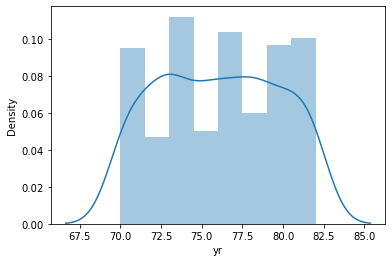

In [14]:
sns.distplot(Auto_data1['yr'])

As per above Univariate Analysis, we can say that -
1) Hourse Power & mpg data is right Skewed

2) Acceleration have normal data distribution

3) Most of the data from cylinders belogs to value 4

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Bivariate Analysis

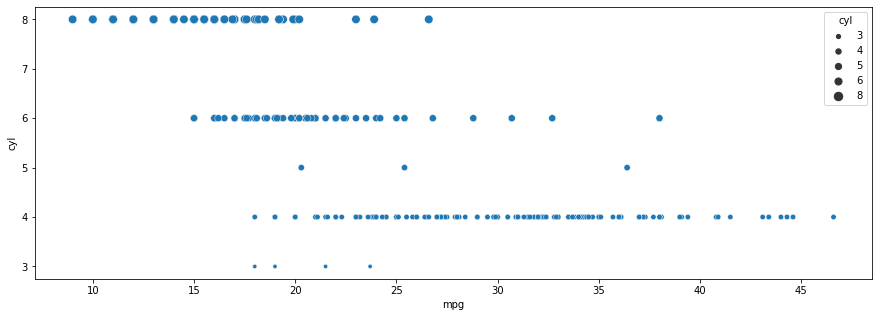

In [15]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=Auto_data1['mpg'],y='cyl', data=Auto_data1, size = "cyl") # scatter plot

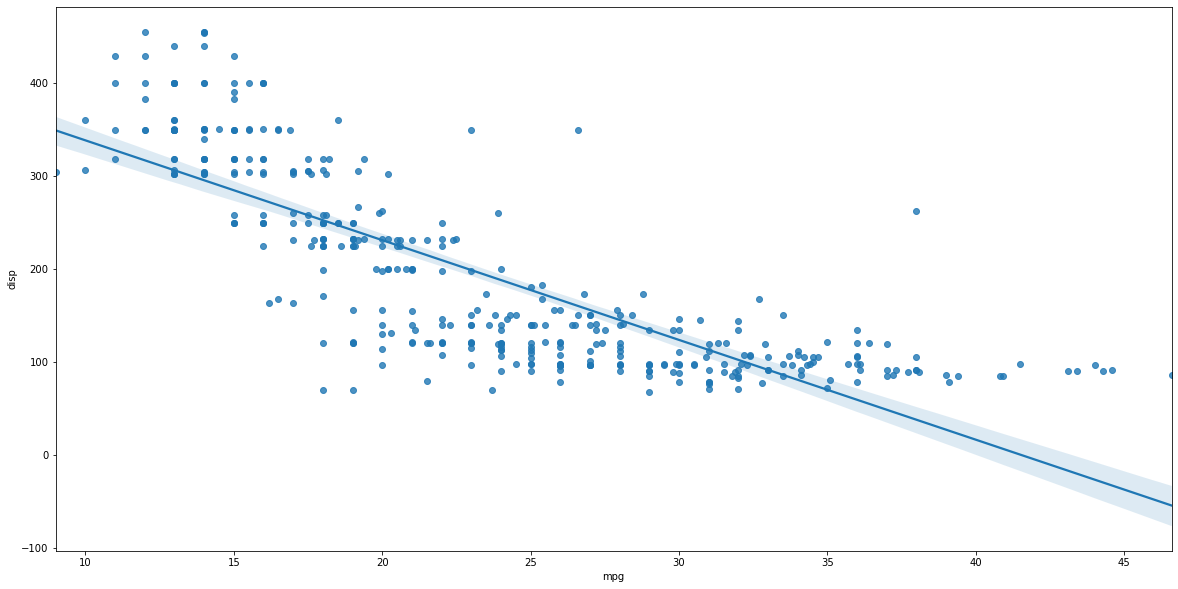

In [16]:
figure = plt.figure(figsize=(20,10))

ax = sns.regplot(x='mpg',y='disp', data=Auto_data1 ) # regression plot - scatter plot with a regression line

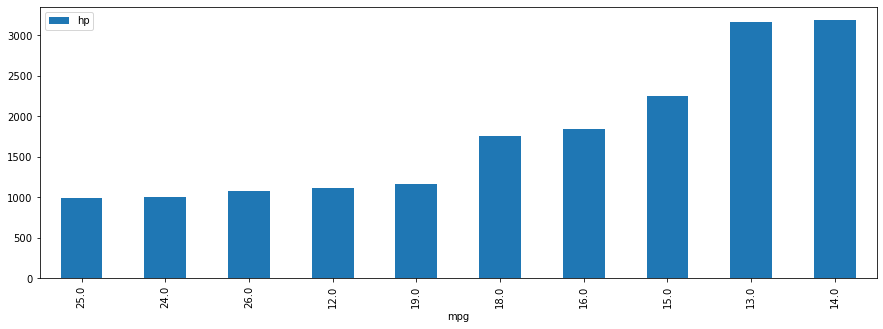

In [17]:
Auto_data1.groupby(by=['mpg'])['hp'].sum().reset_index().sort_values(['hp']).tail(10).plot(x='mpg', y='hp',kind='bar',figsize=(15,5))
plt.show()

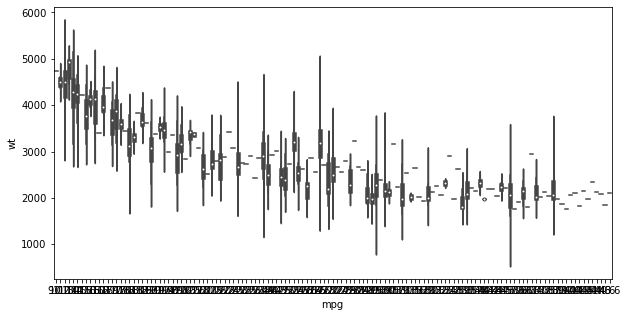

In [18]:
plt.figure(figsize=(10,5))
sns.violinplot(x=Auto_data1['mpg'], y=Auto_data1['wt'])
plt.show()

As per above Bivariate Analysis, we can say that -
1) mpg value is increasing with decreasing number of cylinder & displacement

2) mpg & hourse power have possitive correlation

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Multivariate Analysis

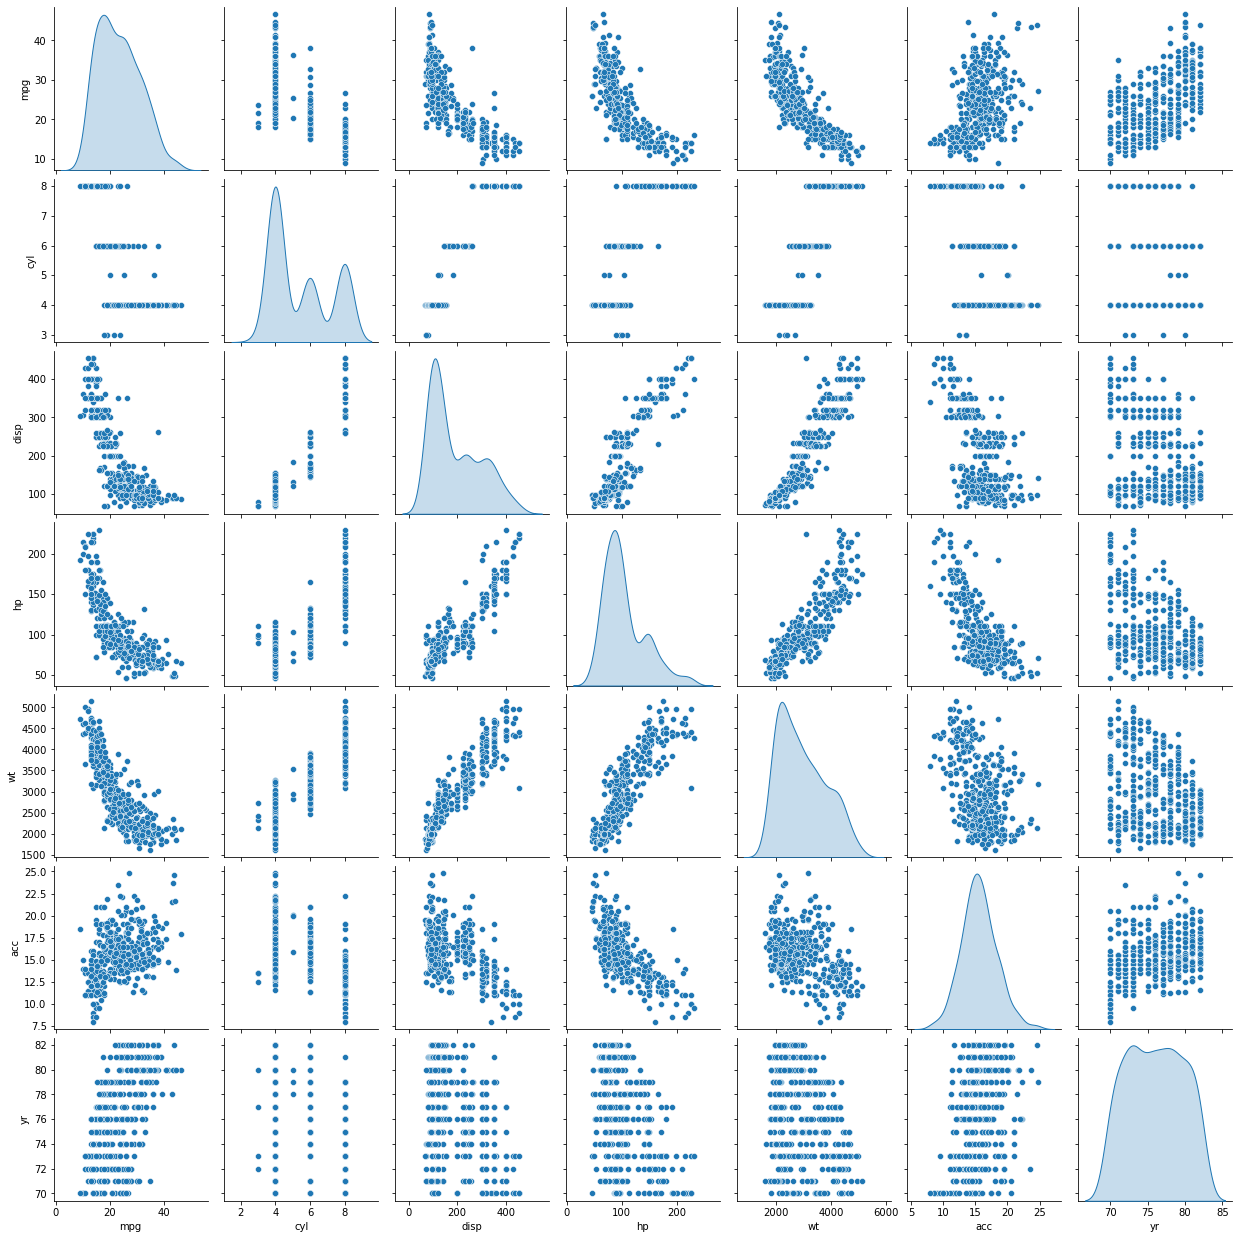

In [19]:
sns.pairplot(Auto_data1, diag_kind='kde')   # to plot density curve instead of histogram on the diag

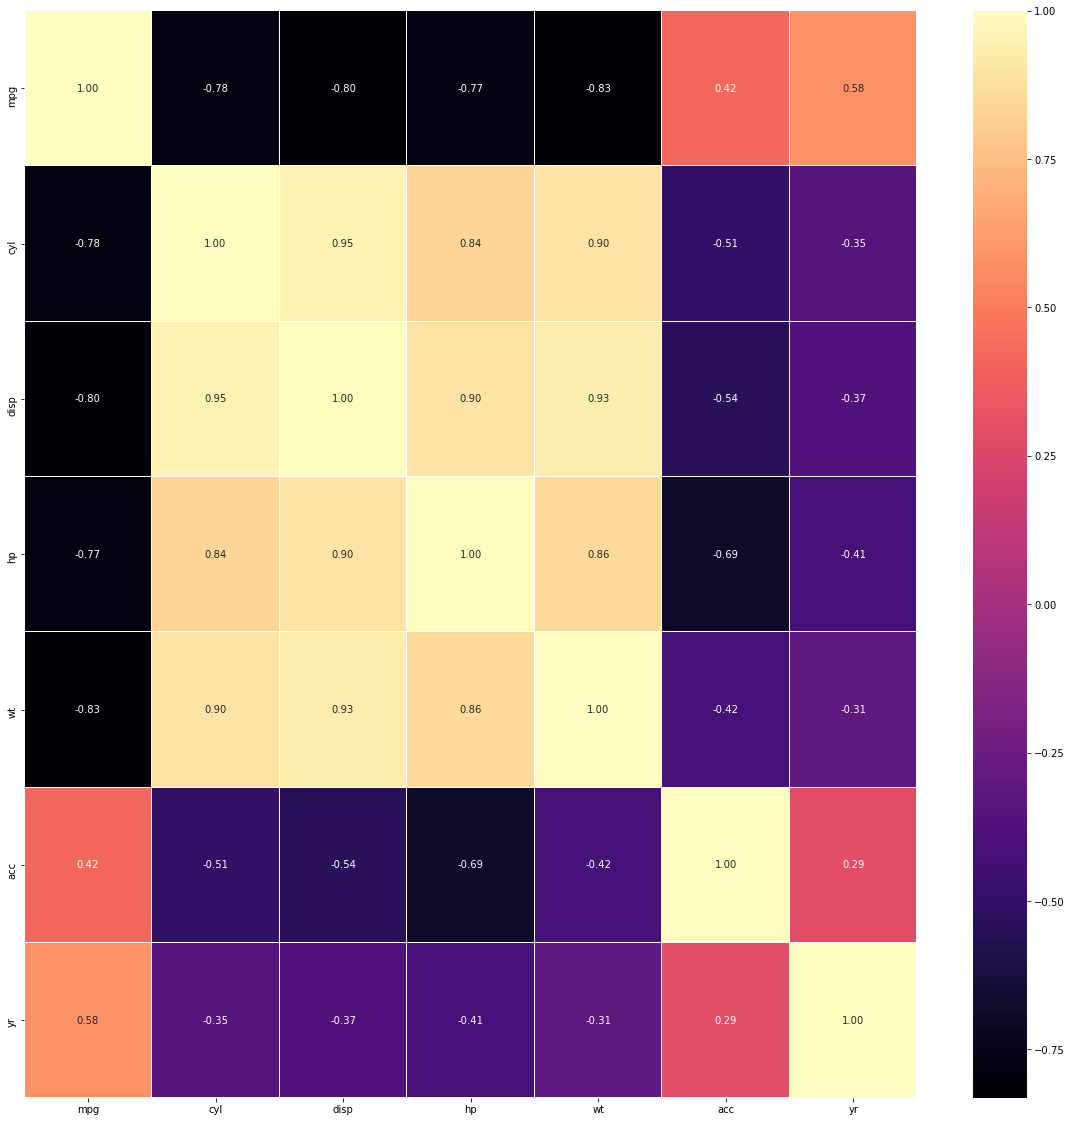

In [20]:
fig,ax = plt.subplots(figsize=(20, 20))   
sns.heatmap(Auto_data1.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

As per above Bivariate Analysis, we can say that - 

1) There are at least 3 number of clusters are available in data

2) weight have positive correlation with cylinders, hours power & displacement

3) Acceletaion & Model Year have week correlation

## 4. Machine learning:

In [21]:
# Normalize the Data
from scipy.stats import zscore
Auto_dataScaled=Auto_data1.apply(zscore)
Auto_dataScaled.head()

mpg       cyl      disp        hp        wt       acc        yr
0 -0.706439  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426
1 -1.090751  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426
2 -0.706439  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426
3 -0.962647  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426
4 -0.834543  1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> K Means :

C:\Users\Roshan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

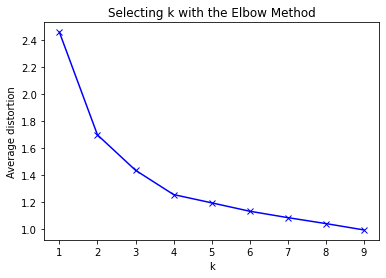

In [22]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Auto_dataScaled)
    prediction=model.predict(Auto_dataScaled)
    meanDistortions.append(sum(np.min(cdist(Auto_dataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / Auto_dataScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


As per above visualization, Number of clusters can be 3 or 4. we are selecting 3 for now.

In [23]:
# Select K=3
k_model=KMeans(3)
k_model.fit(Auto_dataScaled)
k_prediction=k_model.predict(Auto_dataScaled)

#Append the prediction 
Auto_KScaledData = Auto_dataScaled.copy()
Auto_KScaledData["K_GROUP"] = k_prediction
print("Groups Assigned : \n")
Auto_KScaledData.head()

Groups Assigned : 



mpg       cyl      disp        hp        wt       acc        yr  \
0 -0.706439  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426   
1 -1.090751  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426   
2 -0.706439  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426   
3 -0.962647  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426   
4 -0.834543  1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426   

   K_GROUP  
0        2  
1        2  
2        2  
3        2  
4        2

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[K_GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[K_GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[K_GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[K_GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[K_GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[K_GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[K_GROUP]'>,
        <AxesSubplot:>]], dtype=object)

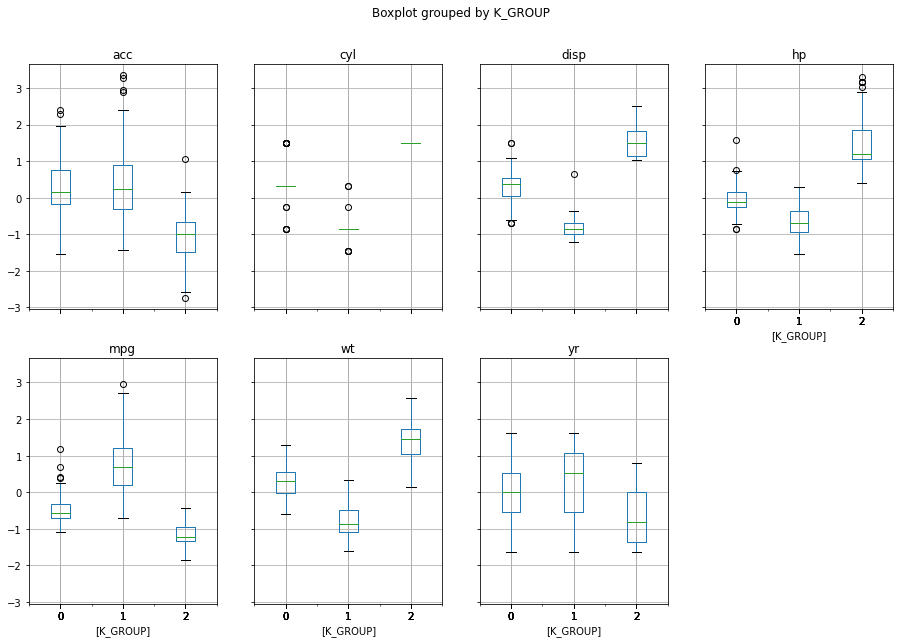

In [24]:
Auto_KScaledData.boxplot(by='K_GROUP', layout = (2,4),figsize=(15,10))

As per above data- 
    
    1) Displacement, hoursepower & weight is high & right skewed in Cluster 1
    
    2) Year & weight don't have any outliers

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Hierarchical clustering

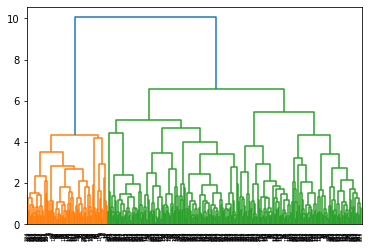

In [25]:
# Complete linkage
mergings = linkage(Auto_dataScaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

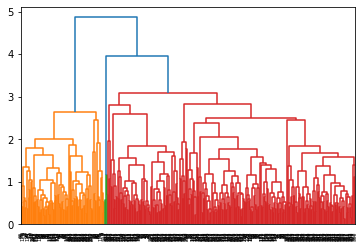

In [26]:
# Average linkage
mergings = linkage(Auto_dataScaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [27]:
h_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
h_model.fit(Auto_dataScaled)
h_prediction=h_model.labels_

#Append the prediction 
Auto_HScaledData = Auto_dataScaled.copy()
Auto_HScaledData["H_GROUP"] = h_prediction
print("Groups Assigned : \n")
Auto_HScaledData.head()

Groups Assigned : 



mpg       cyl      disp        hp        wt       acc        yr  \
0 -0.706439  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426   
1 -1.090751  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426   
2 -0.706439  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426   
3 -0.962647  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426   
4 -0.834543  1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426   

   H_GROUP  
0        1  
1        1  
2        1  
3        1  
4        1

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[H_GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[H_GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[H_GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[H_GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[H_GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[H_GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[H_GROUP]'>,
        <AxesSubplot:>]], dtype=object)

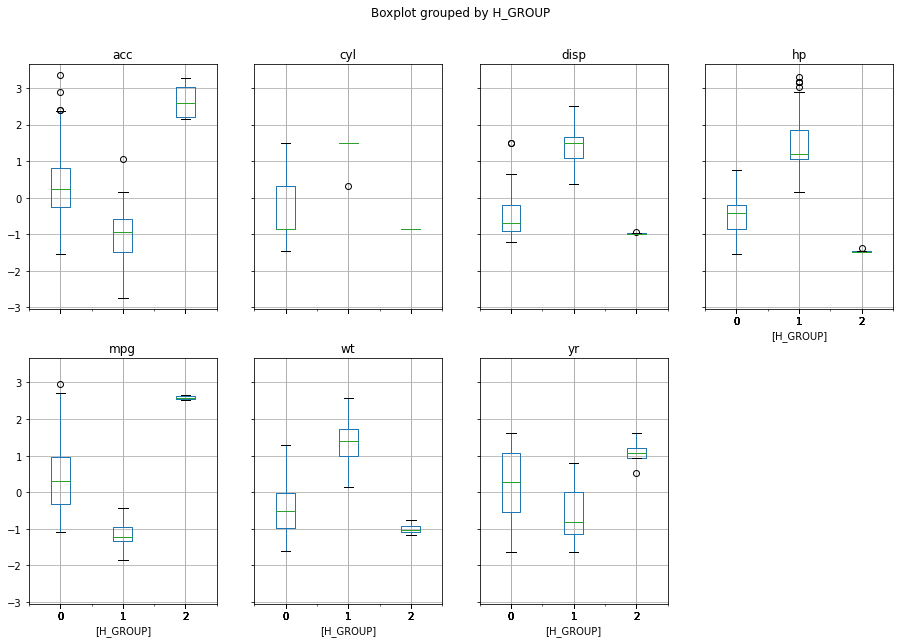

In [28]:
Auto_HScaledData.boxplot(by='H_GROUP', layout = (2,4),figsize=(15,10))

## 5. Answer below questions based on outcomes of using ML based methods

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> • Mention how many optimal clusters are present in the data and what could be the possible reason behind it.
    
    There are 3 or 4 clusters are available in data as grap between Average distortion & K is bennded at K=3,4. Also as per Multivariate Analysis there are max. 3 ups point in kernel.
    Baased on Hierachical Clustering dendogram as wellwe can say that there are 3 to 4 clusters.

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> • Use linear regression model on different clusters separately and print the coefficients of the models individually

In [29]:
Auto_KScaledData.head()

mpg       cyl      disp        hp        wt       acc        yr  \
0 -0.706439  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426   
1 -1.090751  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426   
2 -0.706439  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426   
3 -0.962647  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426   
4 -0.834543  1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426   

   K_GROUP  
0        2  
1        2  
2        2  
3        2  
4        2

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Using one single model without clustering

In [30]:
# lets build our linear model
# independant variables
x = Auto_KScaledData.drop(['mpg','K_GROUP'], axis=1)
# the dependent variable
y = Auto_KScaledData[['mpg']]

#split the training & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

#Train the Model
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

print('Regression Model Score :')
print('Training Data :', regression_model.score(x_train, y_train))
print('Tesinging Data :',regression_model.score(x_test, y_test))

RG_Train_All = regression_model.score(x_train, y_train)
RG_Test_All = regression_model.score(x_test, y_test)

Regression Model Score :
Training Data : 0.79968038605472
Tesinging Data : 0.8268047501149659


In [31]:
#Store the Regression Scores for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Regression Model'], 'Train Score': RG_Train_All, 'Test Score' : RG_Test_All})
resultsDf = resultsDf[['Method', 'Train Score','Test Score']]
resultsDf

Method  Train Score  Test Score
0  Regression Model      0.79968    0.826805

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Use linear regression model on different clusters separately

In [32]:
# Train Regression Model on Group 0
group_0 = Auto_KScaledData.groupby(['K_GROUP']).get_group(0)

# lets build our linear model
# independant variables
x = group_0.drop(['mpg','K_GROUP'], axis=1)
# the dependent variable
y = group_0[['mpg']]

#split the training & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

#Train the Model
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

print('Regression Model Scorefor Group 0 :')
print('Training Data :', regression_model.score(x_train, y_train))
print('Tesinging Data :',regression_model.score(x_test, y_test))

RG_Train_Group0 = regression_model.score(x_train, y_train)
RG_Test_Group0 = regression_model.score(x_test, y_test)

# Storing Regression Score in Dataframe
tempResultsDf = pd.DataFrame({'Method':['Regression Model Group 0'], 'Train Score': [RG_Train_Group0],'Test Score': [RG_Test_Group0]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score','Test Score']] 
resultsDf

Regression Model Scorefor Group 0 :
Training Data : 0.5030055621489207
Tesinging Data : 0.37813873764018324


Method  Train Score  Test Score
0          Regression Model     0.799680    0.826805
0  Regression Model Group 0     0.503006    0.378139

In [33]:
# Here are the coefficients for each variable and the intercept of Group 0
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.2205075650510353
The coefficient for disp is -0.08679578037169448
The coefficient for hp is -0.07076158740571938
The coefficient for wt is -0.43843333942360796
The coefficient for acc is -0.08339849223362977
The coefficient for yr is 0.21650975980492648


In [34]:
# Train Regression Model on Group 1
group_1 = Auto_KScaledData.groupby(['K_GROUP']).get_group(1)

# lets build our linear model
# independant variables
x = group_1.drop(['mpg','K_GROUP'], axis=1)
# the dependent variable
y = group_1[['mpg']]

#split the training & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

#Train the Model
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

print('Regression Model Scorefor Group 1 :')
print('Training Data :', regression_model.score(x_train, y_train))
print('Tesinging Data :',regression_model.score(x_test, y_test))

RG_Train_Group1 = regression_model.score(x_train, y_train)
RG_Test_Group1 = regression_model.score(x_test, y_test)

# Storing Regression Score in Dataframe
tempResultsDf = pd.DataFrame({'Method':['Regression Model Group 1'], 'Train Score': [RG_Train_Group1],'Test Score': [RG_Test_Group1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score','Test Score']] 

Regression Model Scorefor Group 1 :
Training Data : 0.6887610867301552
Tesinging Data : 0.6321022202624802


In [35]:
# Here are the coefficients for each variable and the intercept of Group 1
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.2090353415723458
The coefficient for disp is -0.369680701688452
The coefficient for hp is -0.049172054404924906
The coefficient for wt is -0.973360195897663
The coefficient for acc is 0.10277014406615521
The coefficient for yr is 0.44509099720660045


In [36]:
# Train Regression Model on Group 2
group_2 = Auto_KScaledData.groupby(['K_GROUP']).get_group(2)

# lets build our linear model
# independant variables
x = group_2.drop(['mpg','K_GROUP'], axis=1)
# the dependent variable
y = group_2[['mpg']]

#split the training & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

#Train the Model
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

print('Regression Model Scorefor Group 2 :')
print('Training Data :', regression_model.score(x_train, y_train))
print('Tesinging Data :',regression_model.score(x_test, y_test))

RG_Train_Group2 = regression_model.score(x_train, y_train)
RG_Test_Group2 = regression_model.score(x_test, y_test)

# Storing Regression Score in Dataframe
tempResultsDf = pd.DataFrame({'Method':['Regression Model Group 2'], 'Train Score': [RG_Train_Group2],'Test Score': [RG_Test_Group2]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score','Test Score']] 

Regression Model Scorefor Group 2 :
Training Data : 0.6226932769752426
Tesinging Data : 0.39064625245228124


In [37]:
# Here are the coefficients for each variable and the intercept of Group 2
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.31032142990931616
The coefficient for disp is 0.027584323024758127
The coefficient for hp is -0.15817513612143702
The coefficient for wt is -0.16674110967878053
The coefficient for acc is -0.1528773883456508
The coefficient for yr is 0.16417548808069918


<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction

In [38]:
resultsDf

Method  Train Score  Test Score
0          Regression Model     0.799680    0.826805
0  Regression Model Group 0     0.503006    0.378139
0  Regression Model Group 1     0.688761    0.632102
0  Regression Model Group 2     0.622693    0.390646

As per above data, we can say that - Regression Score is higher in 1st Regression Model, which have all data. Regresson Score is getting decrease when e tried regression model on different clusters.

## 6. Improvisation:


<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea">Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future.

    1) Car price should be require, which provide better prediction.
    2) Instead of mpg, It should contain City mpg and highway mpg
    3) There should not be any null values in data.

# PART 2 :

# DOMAIN: Manufacturing

## CONTEXT: 
Company X curates and packages wine across various vineyards spread throughout the country.

## DATA DESCRIPTION: The data concerns the chemical composition of the wine and its respective quality.
Attribute Information:
1. A, B, C, D: specific chemical composition measure of the wine
2. Quality: quality of wine [ Low and High ]

## PROJECT OBJECTIVE: 
Goal is to build a synthetic data generation model using the existing data provided by the company.

In [98]:
# Importing Data files
M_data = pd.read_excel('Part2 - Company.xlsx')
print(M_data["Quality"].unique())
M_data.head()

['Quality A' 'Quality B' nan]


A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

In [99]:
#Split the data
x = M_data.drop(['Quality'],axis=1)
y = M_data['Quality']

# Normalize rhe Data
from scipy.stats import zscore
xScaled=x.apply(zscore)
xScaled.head()

A         B         C         D
0 -1.168034 -1.561080 -1.061569 -0.103138
1  0.904992  0.284923  0.306077  0.823013
2  0.660147  0.807376  0.321443  0.264129
3 -0.939512 -1.630740 -1.706975 -1.125099
4 -0.972158 -0.986381 -1.614775 -0.741864

In [101]:
# Select K=2
k_model=KMeans(2)
k_model.fit(xScaled)
prediction=k_model.predict(xScaled)

#Append the prediction 
M_data["Quality_Predicted"] = prediction
print("Groups Assigned : \n")
M_data.head(10)

Groups Assigned : 



A    B    C    D    Quality  Quality_Predicted
0   47   27   45  108  Quality A                  1
1  174  133  134  166  Quality B                  0
2  159  163  135  131        NaN                  0
3   61   23    3   44  Quality A                  1
4   59   60    9   68  Quality A                  1
5  153  140  154  199        NaN                  0
6   34   28   78   22  Quality A                  1
7  191  144  143  154        NaN                  0
8  160  181  194  178  Quality B                  0
9  145  178  158  141        NaN                  0

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea">As per above observation Predicted Quality & Actual Quality are Similar, So replacing the missing Targeted values with predicted values

In [102]:
# Replace Predicted Values with Missing targeted values
M_data.Quality.fillna(M_data.Quality_Predicted, inplace=True)

#Replace the 0 with Quality B & 1 With Quality A
M_data['Quality'].replace([0, 1], ['Quality B','Quality A'],inplace=True)
M_data.drop(['Quality_Predicted'],axis=1,inplace=True)
M_data.head(10)

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131  Quality B
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A
5  153  140  154  199  Quality B
6   34   28   78   22  Quality A
7  191  144  143  154  Quality B
8  160  181  194  178  Quality B
9  145  178  158  141  Quality B

# PART 3 :

# DOMAIN: Automobile

## CONTEXT: 
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette.
The vehicle may be viewed from one of many different angles.

## DATA DESCRIPTION: 
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles
were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

• All the features are numeric i.e. geometric features extracted from the silhouette.

## PROJECT OBJECTIVE: 
Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the
model using just the raw data.

## 1. Data: Import, clean and pre-process the data :

In [43]:
# Importing Data files
V_data = pd.read_csv('Part3 - vehicle.csv')

# explore shape and size of each
print(V_data.size,V_data.shape)

V_data.head()

16074 (846, 19)


compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [44]:
V_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [45]:
V_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [46]:
# Replace missing values with Median
V_data=V_data.fillna(V_data.median())

V_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [47]:
#Use label encoder to convert categorical variables to one-hot encoding (dummy variables)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
V_data['class'] = le.fit_transform(V_data['class'])

In [48]:
print(V_data['class'].unique())

[2 1 0]


## 2. EDA and visualisation :

In [49]:
V_data.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        846.000000     846.000000  846.000000  
mean         188.918440     195.632388    0.977541  
std            6.152247       7.438797    0.702130  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    0.000000  
50%          188.000000     197.000000    1.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Univariate Analysis

array([[<AxesSubplot:title={'center':'compactness'}>,
        <AxesSubplot:title={'center':'circularity'}>,
        <AxesSubplot:title={'center':'distance_circularity'}>,
        <AxesSubplot:title={'center':'radius_ratio'}>],
       [<AxesSubplot:title={'center':'pr.axis_aspect_ratio'}>,
        <AxesSubplot:title={'center':'max.length_aspect_ratio'}>,
        <AxesSubplot:title={'center':'scatter_ratio'}>,
        <AxesSubplot:title={'center':'elongatedness'}>],
       [<AxesSubplot:title={'center':'pr.axis_rectangularity'}>,
        <AxesSubplot:title={'center':'max.length_rectangularity'}>,
        <AxesSubplot:title={'center':'scaled_variance'}>,
        <AxesSubplot:title={'center':'scaled_variance.1'}>],
       [<AxesSubplot:title={'center':'scaled_radius_of_gyration'}>,
        <AxesSubplot:title={'center':'scaled_radius_of_gyration.1'}>,
        <AxesSubplot:title={'center':'skewness_about'}>,
        <AxesSubplot:title={'center':'skewness_about.1'}>],
       [<AxesSubplot:tit

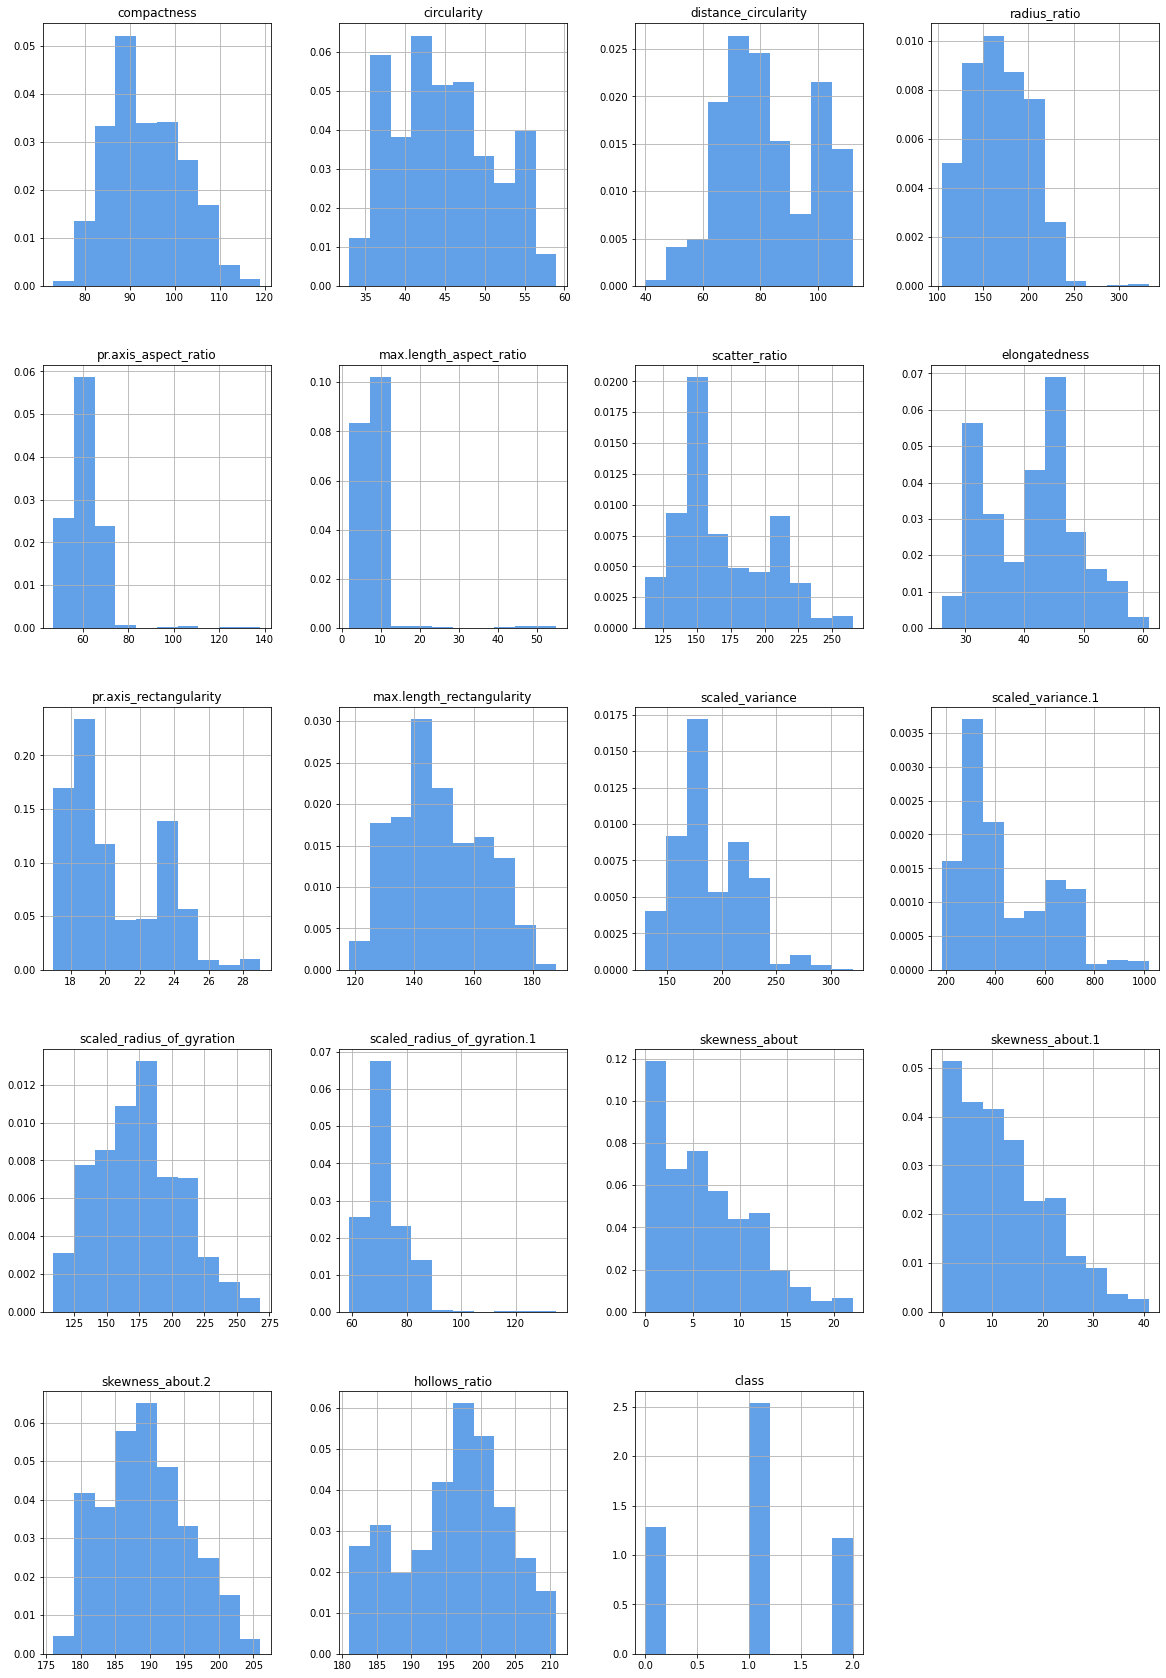

In [50]:
V_data.hist(figsize=(20,30),density=True, color='#62A1E7')

As per above plots most of the data is right skewed with 3 clusters

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Bi-variate Analysis

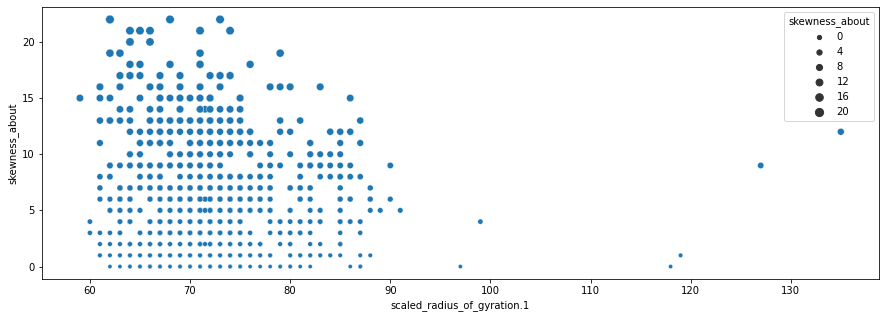

In [51]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=V_data['scaled_radius_of_gyration.1'],y='skewness_about', data=V_data, size = "skewness_about") # scatter plot

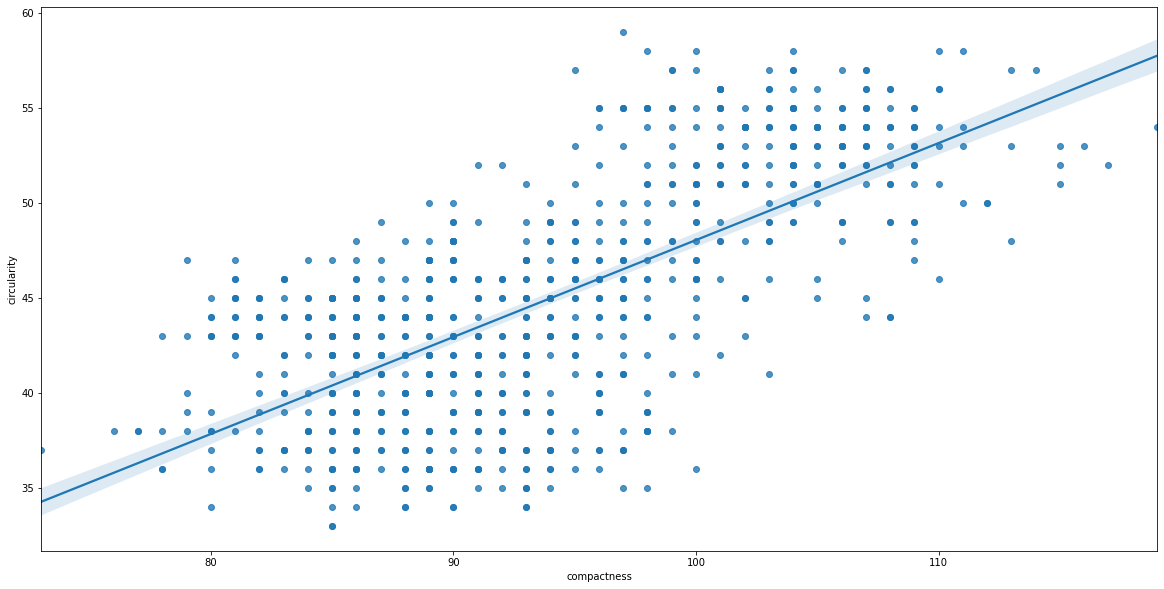

In [52]:
figure = plt.figure(figsize=(20,10))

ax = sns.regplot(x='compactness',y='circularity', data=V_data) # regression plot - scatter plot with a regression line

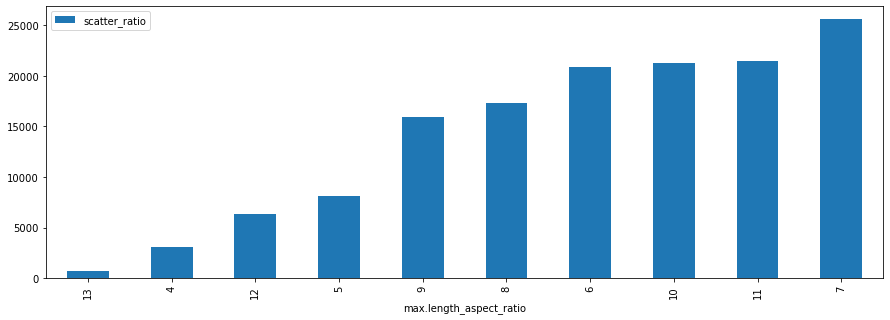

In [53]:
V_data.groupby(by=['max.length_aspect_ratio'])['scatter_ratio'].sum().reset_index().sort_values(['scatter_ratio']).tail(10).plot(x='max.length_aspect_ratio',
                                                                                                           y='scatter_ratio',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

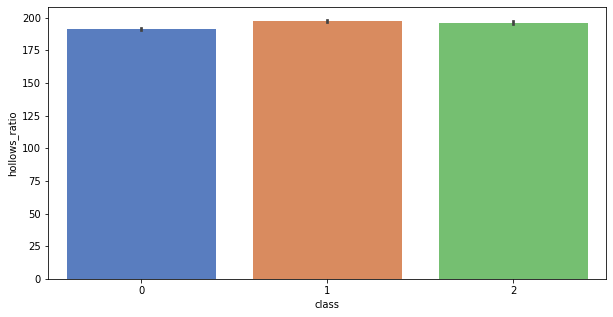

In [54]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='class', y='hollows_ratio', data=V_data, palette='muted')  # barplot

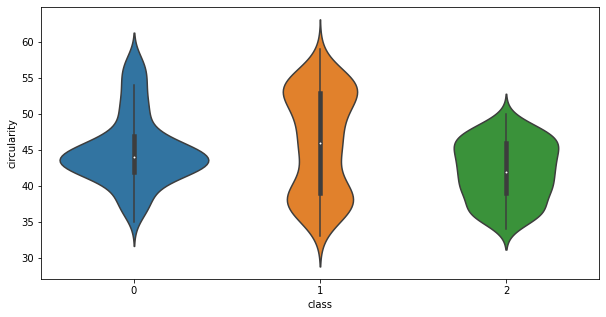

In [55]:
plt.figure(figsize=(10,5))
sns.violinplot(x=V_data['class'], y=V_data['circularity'])
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Multivariate Analysis

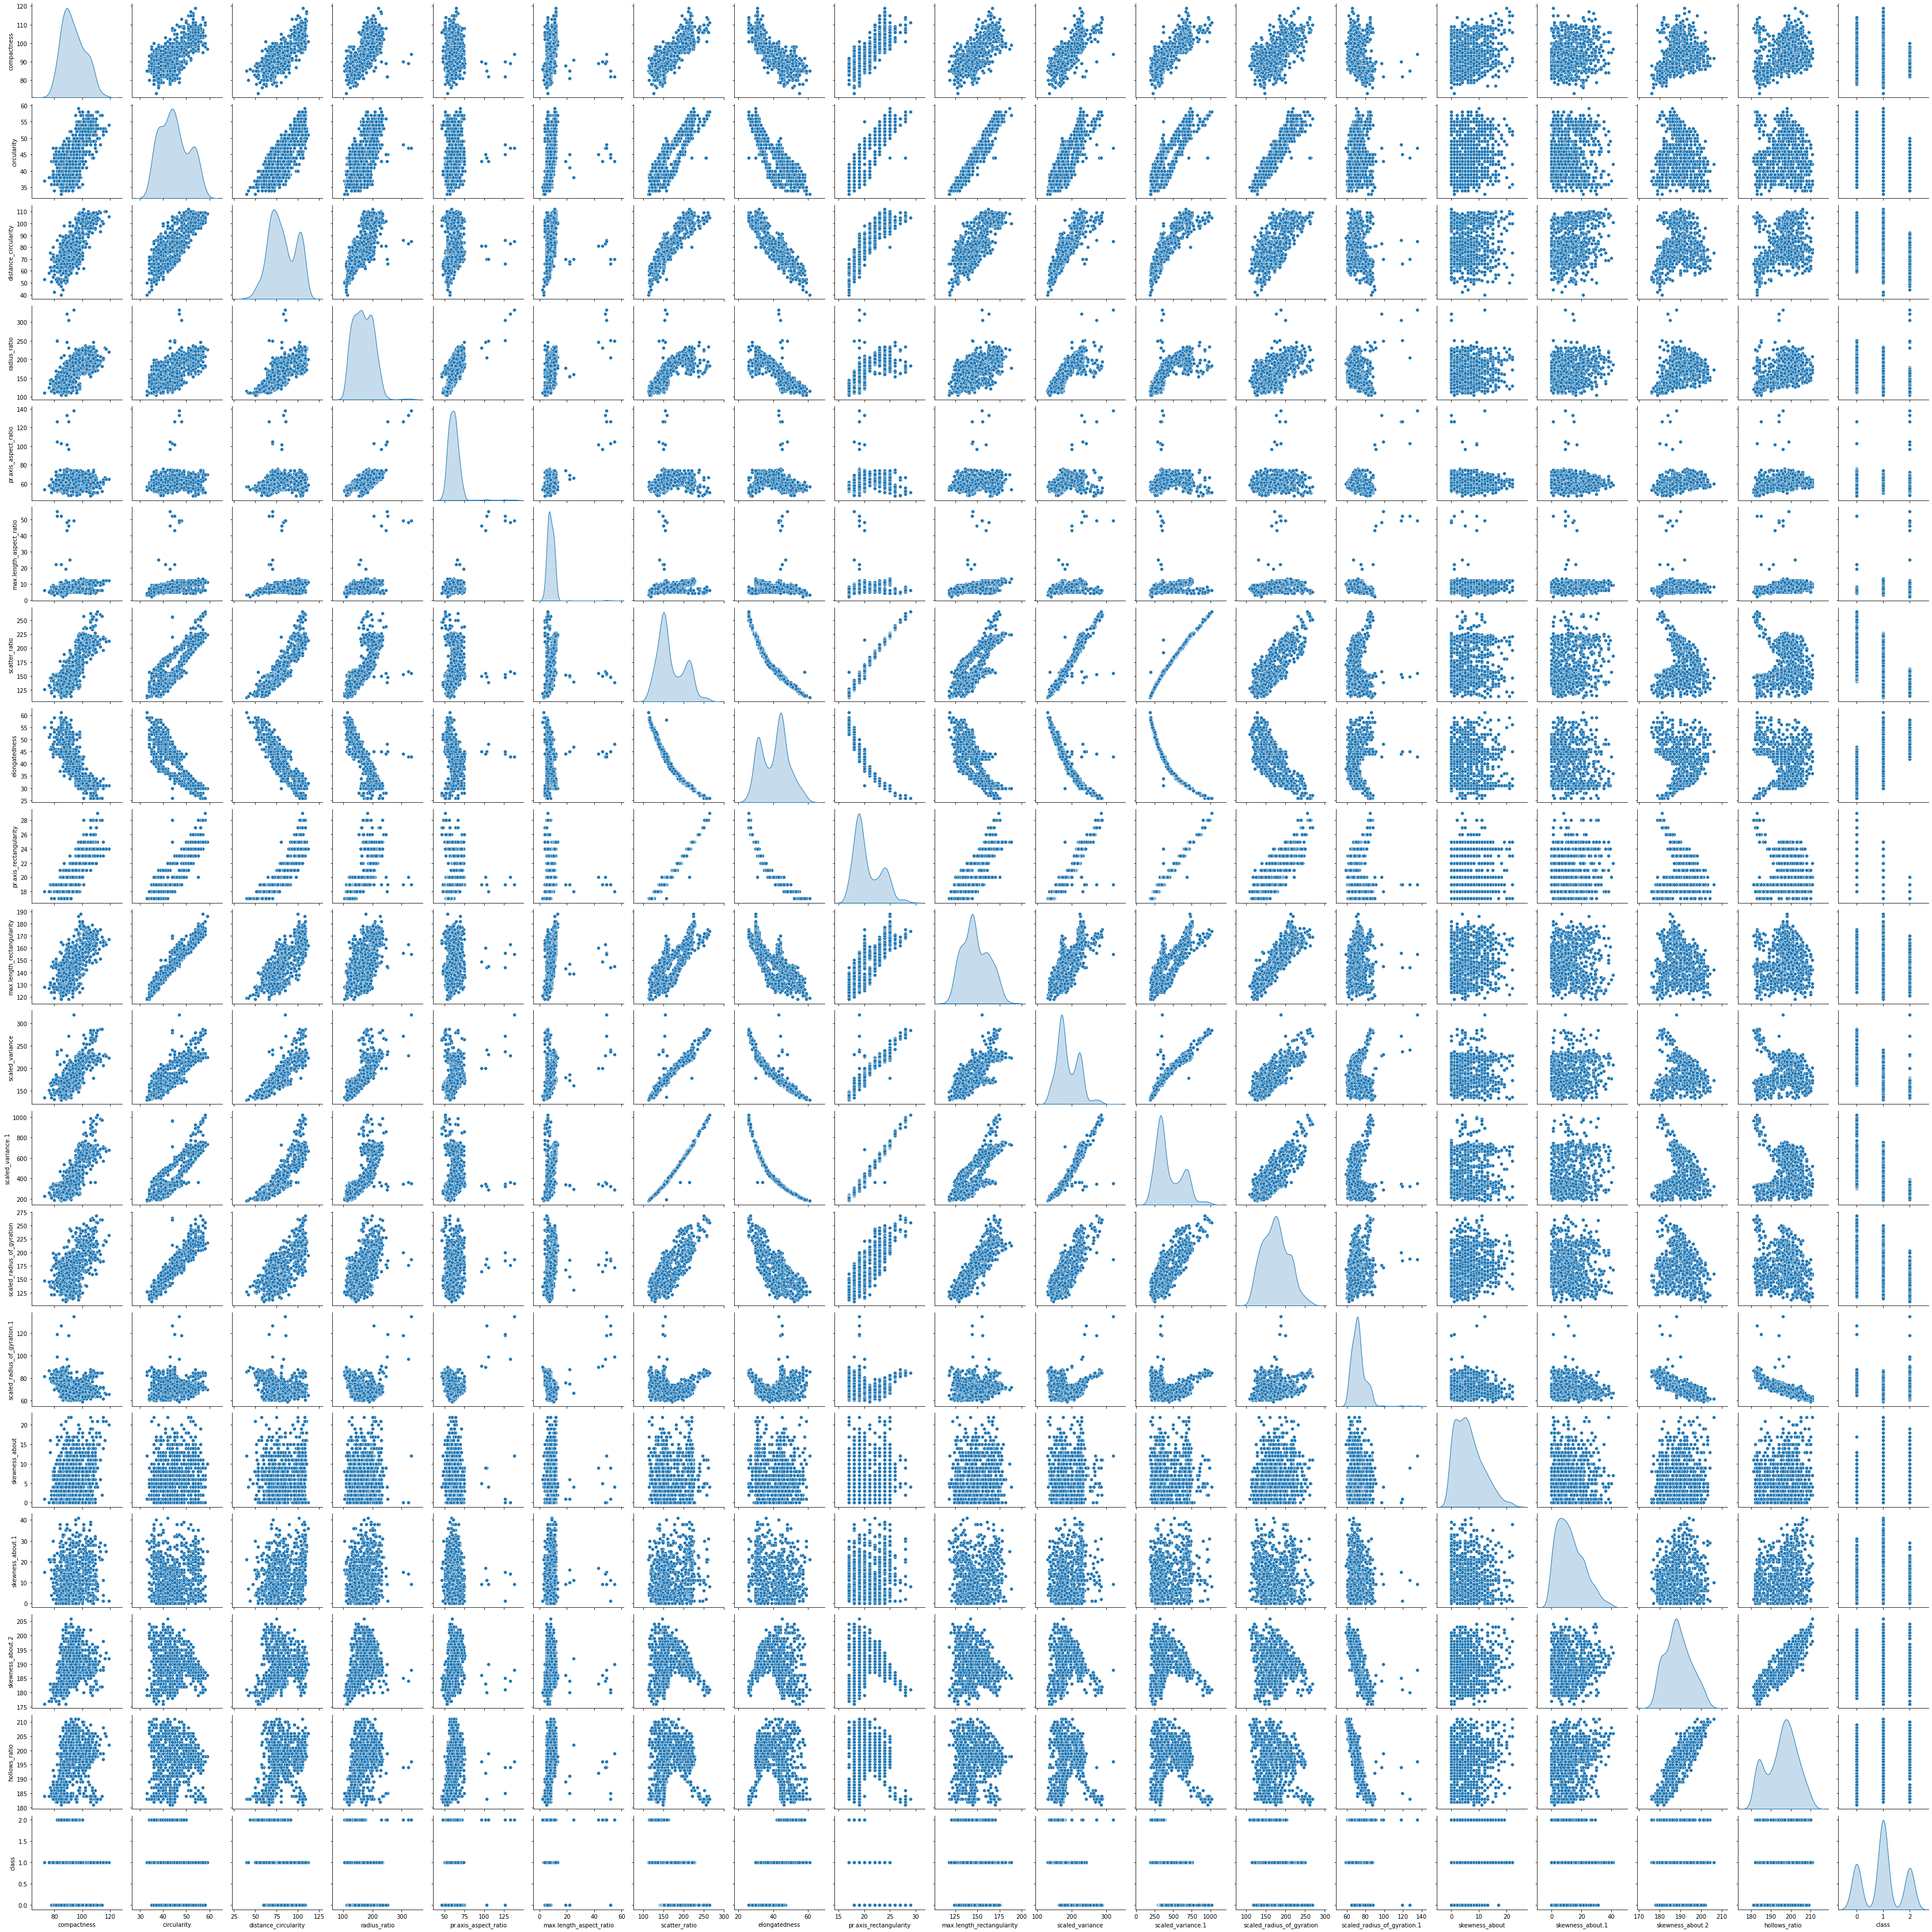

In [56]:
sns.pairplot(V_data, diag_kind='kde')   # to plot density curve instead of histogram on the diag

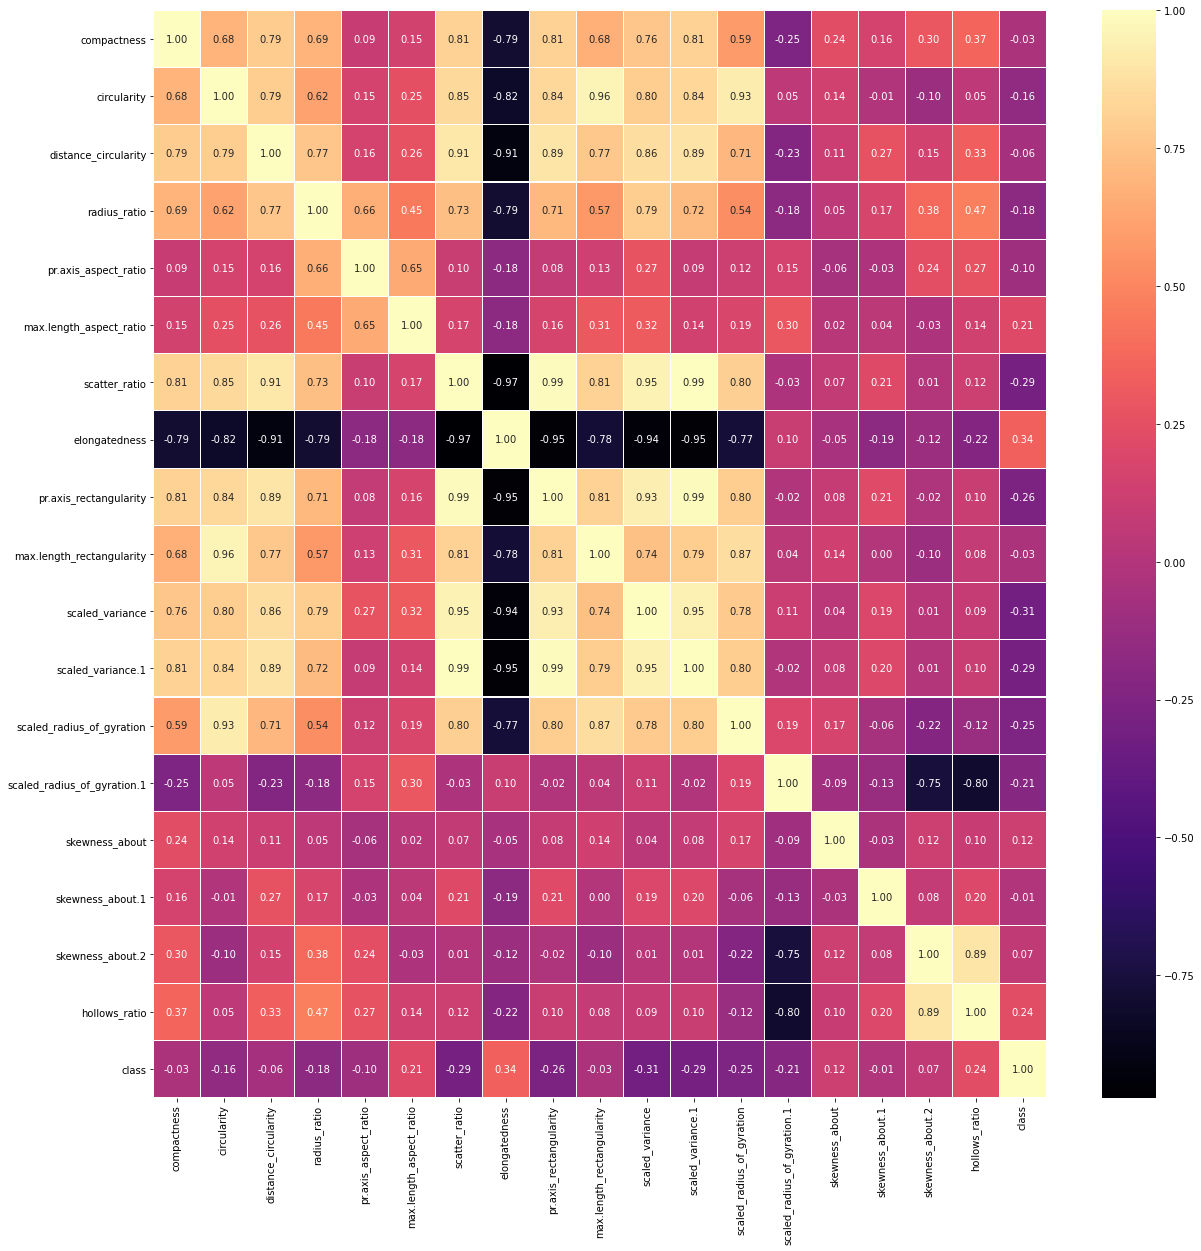

In [57]:
fig,ax = plt.subplots(figsize=(20, 20))   
sns.heatmap(V_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

As per above data we can say that -

    1) compactness & Circularity have possitive correlation
    
    2) pr.axis_rectangularity & Scaled_variance1 have highest correlation with Scatter_ratio
    
    3) elongatedness has week correlation with most of the data

## 3. Classifier: Design and train a best fit SVM classier using all the data attributes

In [58]:
# independant variables
x = V_data.drop(['class'], axis=1)
# the dependent variable
y = V_data[['class']]

In [59]:
from scipy.stats import zscore
xScaled=x.apply(zscore)
xScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [60]:
covMatrix = np.cov(xScaled,rowvar=False)

print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [61]:
# Split the Training & Test data
X_train, X_test, y_train, y_test = train_test_split(xScaled, y, test_size =.30, random_state=10)

In [62]:
from sklearn import svm

# train SVM Model
clf = svm.SVC()
clf.fit(X_train, y_train)
print ('Before PCA score', clf.score(X_test, y_test))
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

accuracy_train = round(metrics.accuracy_score(y_train, y_train_pred),3)
accuracy_test = round(metrics.accuracy_score(y_test, y_test_pred),3)

Before PCA score 0.9606299212598425


C:\Users\Roshan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [63]:
#Store the Regression Scores for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Accuracy':['Before PCA'], 'Training': accuracy_train, 'Testing' : accuracy_test})
resultsDf = resultsDf[['Accuracy', 'Training','Testing']]
resultsDf

Accuracy  Training  Testing
0  Before PCA     0.975    0.961

## 4. Dimensional reduction: perform dimensional reduction on the data.

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=18)
pca.fit(xScaled)

PCA(n_components=18)

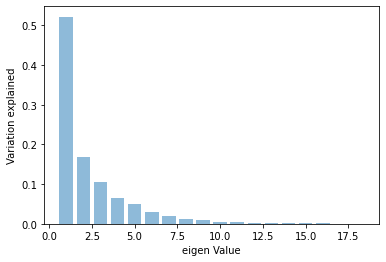

In [65]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

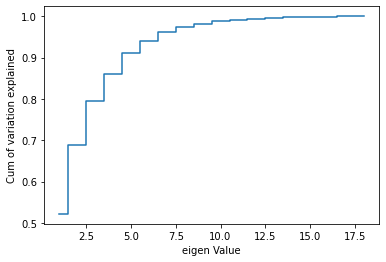

In [66]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

Now 8 dimensions seems very reasonable. With 8 variables we can explain over 95% of the variation in the original data!

In [67]:
pca8 = PCA(n_components=8)
pca8.fit(xScaled)
print(pca8.components_)
print(pca8.explained_variance_ratio_)
Xpca8 = pca8.transform(xScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [68]:
Xpca8

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00, ...,
        -7.57446693e-01, -9.01124283e-01, -3.81106357e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01, ...,
        -5.17161832e-01,  3.78636988e-01,  2.47058909e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02, ...,
         7.05041037e-01, -3.45837595e-02,  4.82771767e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01, ...,
        -2.17069763e-01,  5.73248962e-01,  1.10477865e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01, ...,
        -4.02491279e-01, -2.02405787e-01,  3.20621635e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01, ...,
        -3.35637136e-01,  5.80978683e-02, -2.48034955e-01]])

## 5. Classifier: Design and train a best fit SVM classier using dimensionally reduced attributes.

In [69]:
X_pca8_train, X_pca8_test, y_train, y_test = train_test_split(Xpca8, y, test_size =.30, random_state=10)

In [70]:
clf.fit(X_pca8_train, y_train)
print ('After PCA score', clf.score(X_pca8_test, y_test))
y_train_pred = clf.predict(X_pca8_train)
y_test_pred = clf.predict(X_pca8_test)

accuracy_train = round(metrics.accuracy_score(y_train, y_train_pred),3)
accuracy_test = round(metrics.accuracy_score(y_test, y_test_pred),3)

# Storing Regression Score in Dataframe
tempResultsDf = pd.DataFrame({'Accuracy':['After PCA'], 'Training': [accuracy_train],'Testing': [accuracy_test]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Accuracy', 'Training','Testing']] 

After PCA score 0.9291338582677166


C:\Users\Roshan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## 6. Conclusion: 

In [71]:
resultsDf

Accuracy  Training  Testing
0  Before PCA     0.975    0.961
0   After PCA     0.965    0.929

As per above table Accuracy on Trenning and Test set is reduced after dimentional reduction from 18 dimensions to 8, but still there is no larch difference in prediction. 8 Dimensions are still good predictors in this case

# PART 4 :

# DOMAIN: Sports management

## CONTEXT: 
Company X is a sports management company for international cricket.

## DATA DESCRIPTION: 
    
    The data is collected belongs to batsman from IPL series conducted so far. Attribute Information:
1. Runs: Runs score by the batsman
2. Ave: Average runs scored by the batsman per match
3. SR: strike rate of the batsman
4. Fours: number of boundary/four scored
5. Six: number of boundary/six scored
6. HF: number of half centuries scored so far

## PROJECT OBJECTIVE:
Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

In [72]:
# Importing Data files
sportData = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')

# explore shape and size of each
print(sportData.size,sportData.shape)

sportData.head()

1260 (180, 7)


Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

In [73]:
# Drop Null Value
sportData.dropna(inplace=True)

sportData.head(10)

Name   Runs    Ave      SR  Fours  Sixes   HF
1         CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
3        G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
5         V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
7         CL White  479.0  43.54  149.68   41.0   20.0  5.0
9         S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0
11       AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0
13    KP Pietersen  305.0  61.00  147.34   22.0   20.0  3.0
15       RG Sharma  433.0  30.92  126.60   39.0   18.0  5.0
17  AB de Villiers  319.0  39.87  161.11   26.0   15.0  3.0
19       JP Duminy  244.0  81.33  128.42   13.0   11.0  2.0

In [74]:
# Drop the Name column
# independant variables
x = sportData.drop(['Name'], axis=1)
# the dependent variable
y = sportData[['Name']]

## EDA and visualisation:

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Univariate Analysis

C:\Users\Roshan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Runs', ylabel='Density'>

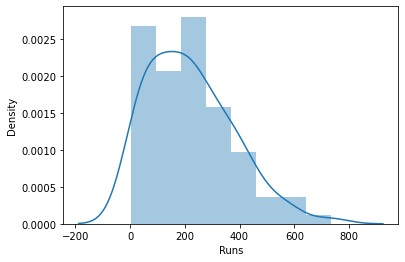

In [75]:
sns.distplot(sportData['Runs'])

(array([1., 1., 4., 2., 1., 2., 3., 4., 5., 4., 5., 3., 3., 2., 6., 6., 3.,
        5., 7., 2., 4., 1., 3., 2., 4., 2., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 0.5   ,  2.1166,  3.7332,  5.3498,  6.9664,  8.583 , 10.1996,
        11.8162, 13.4328, 15.0494, 16.666 , 18.2826, 19.8992, 21.5158,
        23.1324, 24.749 , 26.3656, 27.9822, 29.5988, 31.2154, 32.832 ,
        34.4486, 36.0652, 37.6818, 39.2984, 40.915 , 42.5316, 44.1482,
        45.7648, 47.3814, 48.998 , 50.6146, 52.2312, 53.8478, 55.4644,
        57.081 , 58.6976, 60.3142, 61.9308, 63.5474, 65.164 , 66.7806,
        68.3972, 70.0138, 71.6304, 73.247 , 74.8636, 76.4802, 78.0968,
        79.7134, 81.33  ]),
 <BarContainer object of 50 artists>)

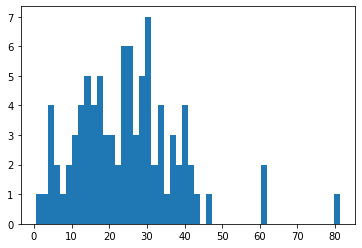

In [76]:
plt.hist(sportData['Ave'], bins=50)

C:\Users\Roshan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SR', ylabel='Density'>

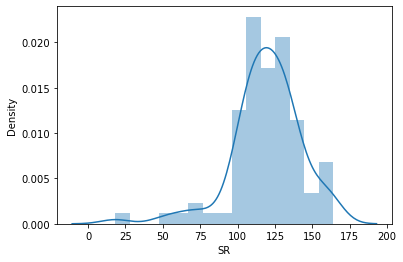

In [77]:
sns.distplot(sportData['SR']) # plots a frequency polygon superimposed on a histogram using the seaborn package.

C:\Users\Roshan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fours', ylabel='Density'>

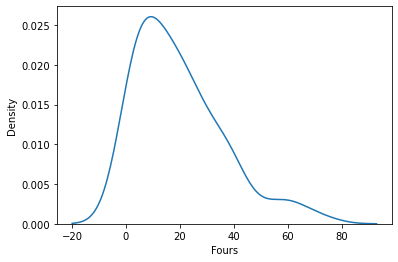

In [78]:
sns.distplot(sportData['Fours'], hist=False) # adding an argument to plot only frequency polygon

(array([18.,  3.,  8., 11.,  4., 11.,  5.,  4.,  5.,  1.,  0.,  6.,  2.,
         1.,  3.,  2.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  1.18,  2.36,  3.54,  4.72,  5.9 ,  7.08,  8.26,  9.44,
        10.62, 11.8 , 12.98, 14.16, 15.34, 16.52, 17.7 , 18.88, 20.06,
        21.24, 22.42, 23.6 , 24.78, 25.96, 27.14, 28.32, 29.5 , 30.68,
        31.86, 33.04, 34.22, 35.4 , 36.58, 37.76, 38.94, 40.12, 41.3 ,
        42.48, 43.66, 44.84, 46.02, 47.2 , 48.38, 49.56, 50.74, 51.92,
        53.1 , 54.28, 55.46, 56.64, 57.82, 59.  ]),
 <BarContainer object of 50 artists>)

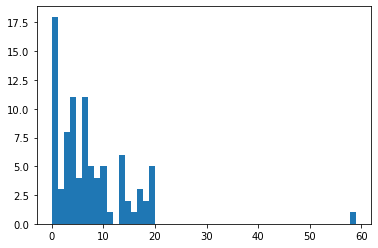

In [79]:
plt.hist(sportData['Sixes'], bins=50)

C:\Users\Roshan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HF', ylabel='Density'>

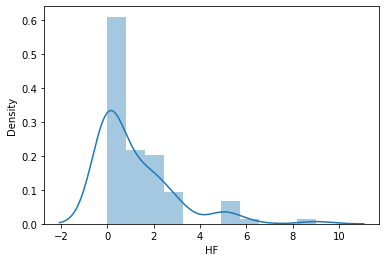

In [80]:
sns.distplot(sportData['HF']) # plots a frequency polygon superimposed on a histogram using the seaborn package.

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Bivariate Analysis

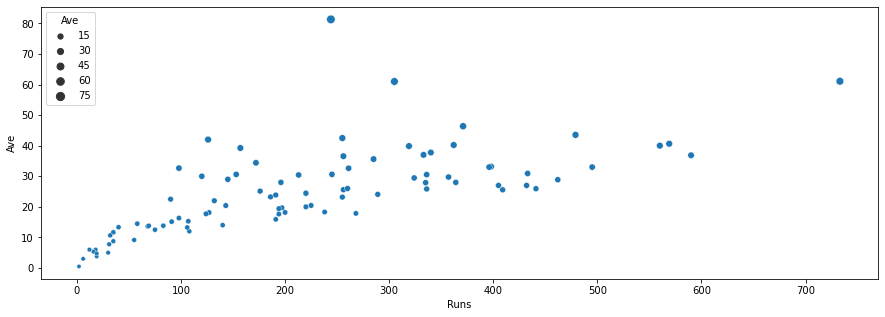

In [81]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=sportData['Runs'],y='Ave', data=sportData, size = "Ave") # scatter plot

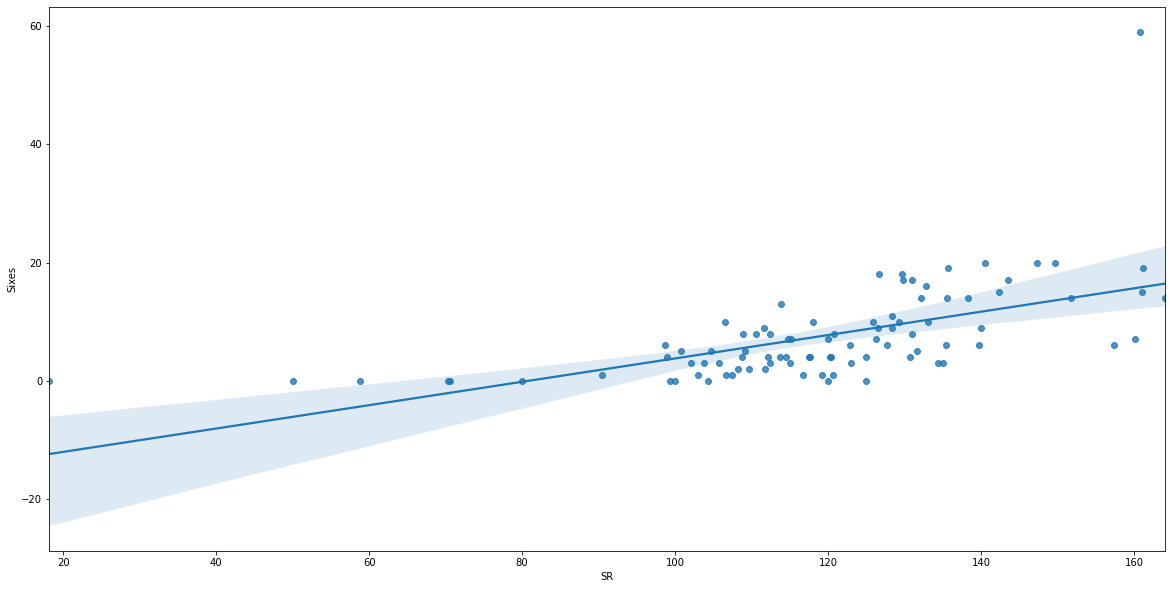

In [82]:
figure = plt.figure(figsize=(20,10))

ax = sns.regplot(x='SR',y='Sixes', data=sportData ) # regression plot - scatter plot with a regression line

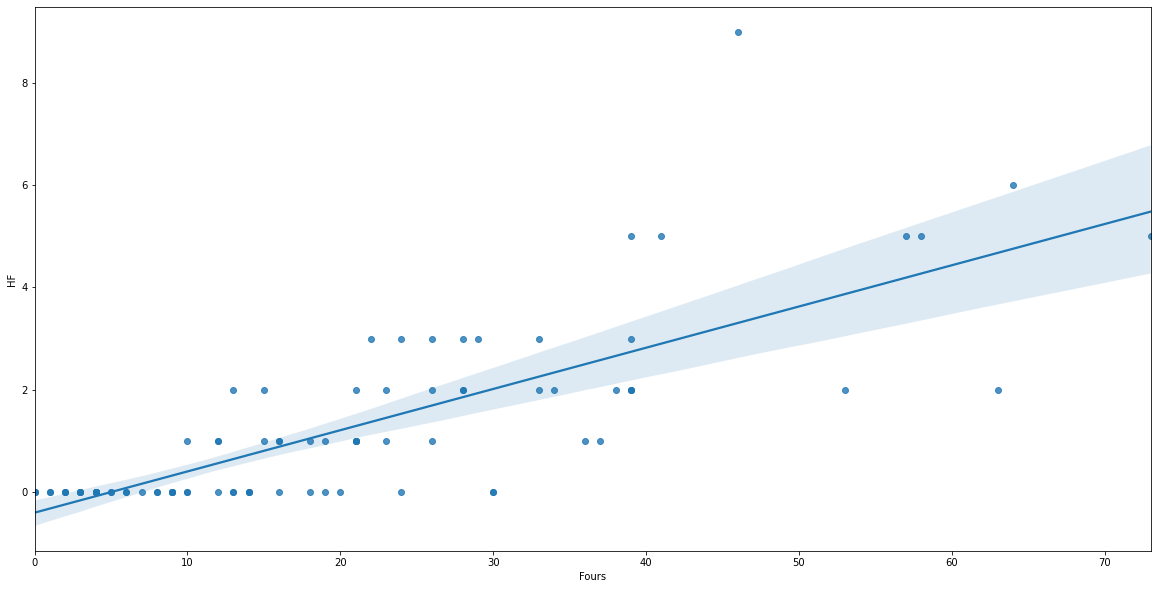

In [83]:
figure = plt.figure(figsize=(20,10))

ax = sns.regplot(x='Fours',y='HF', data=sportData ) # regression plot - scatter plot with a regression line

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Multivariate Analysis

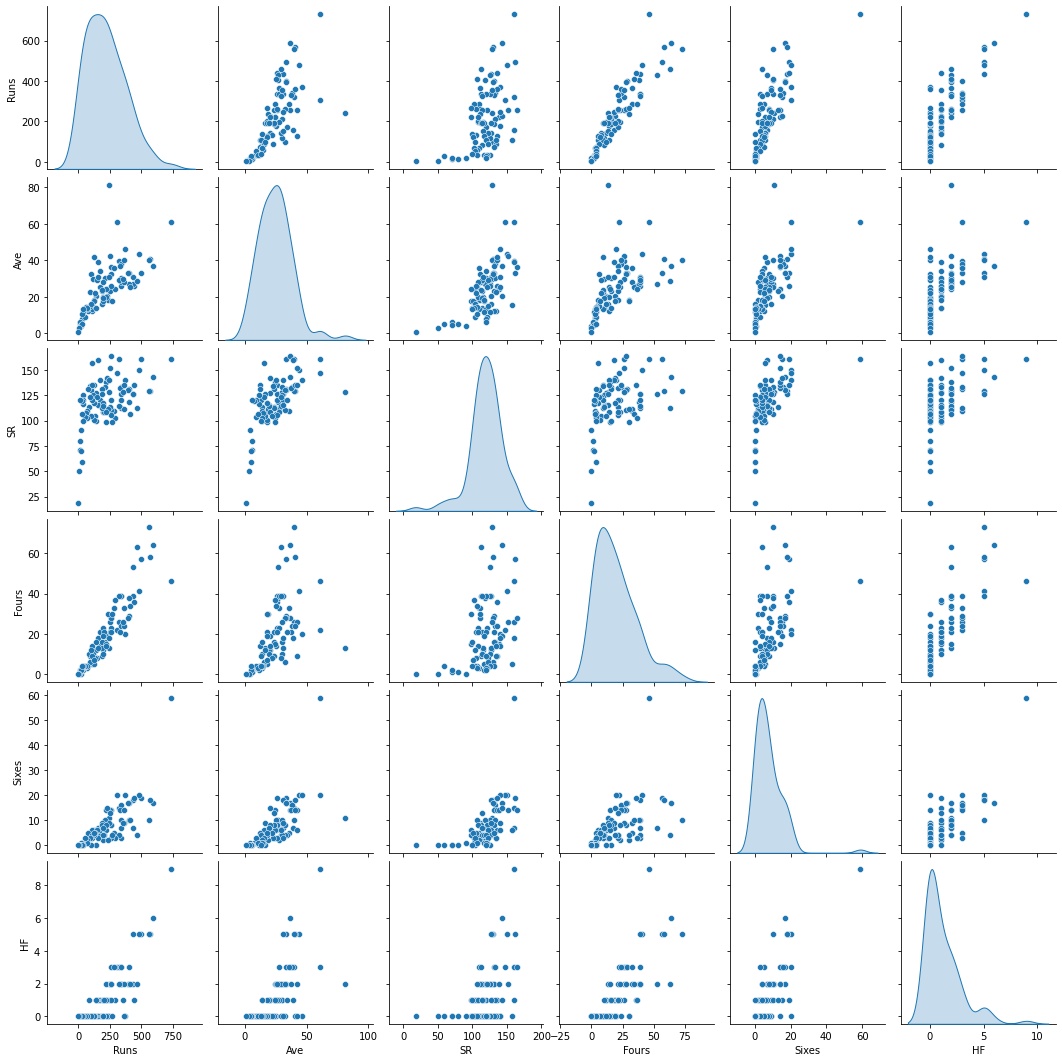

In [84]:
sns.pairplot(sportData, diag_kind='kde')   # to plot density curve instead of histogram on the diag

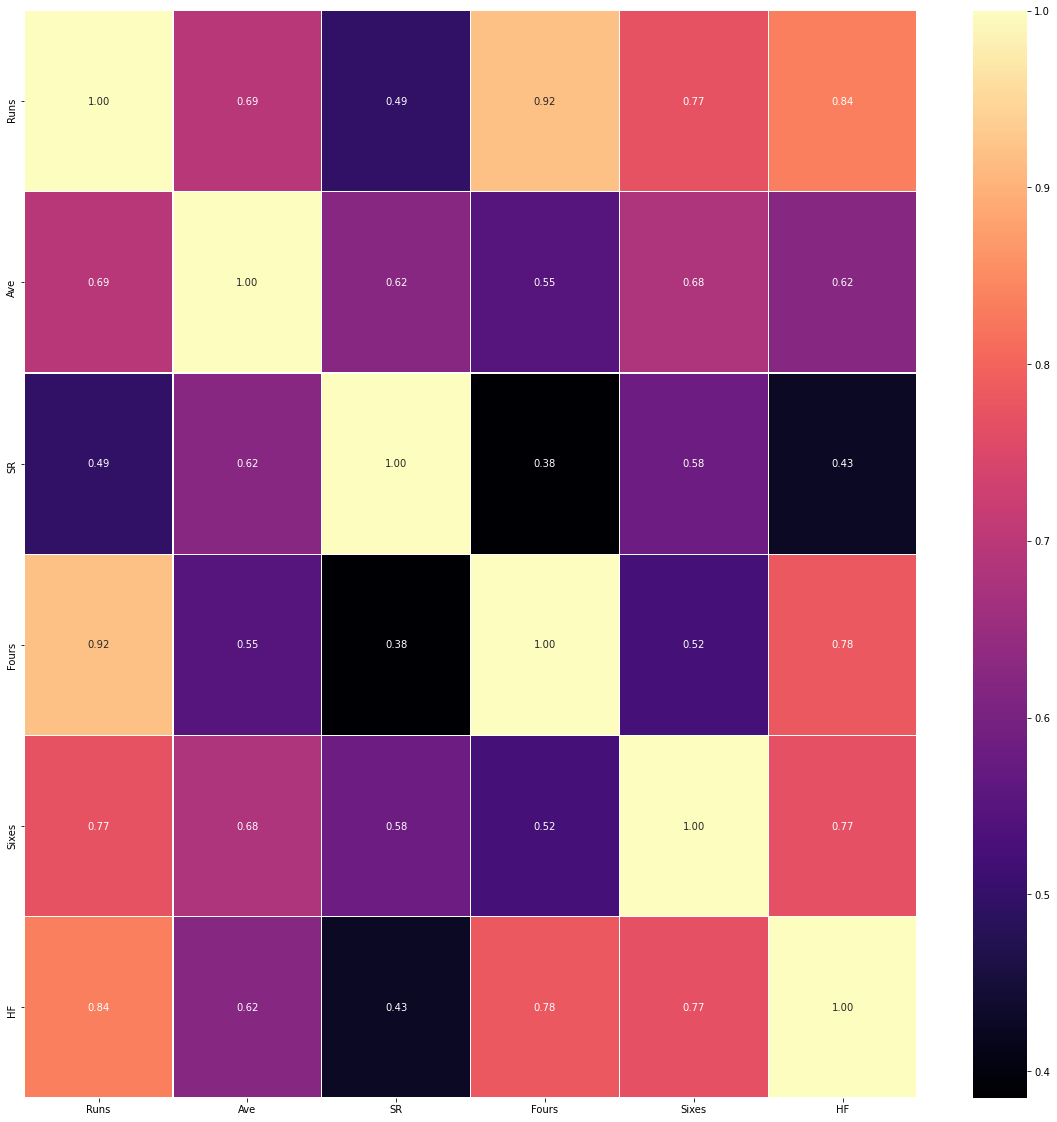

In [85]:
fig,ax = plt.subplots(figsize=(20, 20))   
sns.heatmap(sportData.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

Based on above Analysis, we can say that -

    1) All the data is right skewed except Score
    
    2) There can be 2 or 3 clusters available in data as per karnel 
    
    3) Runs & Fours have high correlation
    
    4) Fours & strike rate of the batsman have low correlation

## Build a data driven model

In [86]:
#Normalize the Data
from scipy.stats import zscore
XScaled=x.apply(zscore)
XScaled.head()

Runs       Ave        SR     Fours     Sixes        HF
1  3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
3  2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
5  1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
7  1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
9  2.246490  1.174755  0.444038  2.343021  1.309851  2.269533

In [87]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [88]:
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(n_components=6)

In [89]:
print(pca.explained_variance_)

[4.30252561 0.83636692 0.41665751 0.32912443 0.16567829 0.01706297]


In [90]:
print(pca.components_)

[[ 0.4582608   0.39797313  0.3253838   0.40574167  0.41733459  0.43237178]
 [ 0.26643209 -0.33111756 -0.69780334  0.47355804 -0.17902455  0.27593225]
 [-0.10977942  0.00550486 -0.45013448 -0.50823538  0.66942589  0.28082541]
 [-0.00520142  0.84736307 -0.43275029 -0.03252305 -0.24878157 -0.17811777]
 [ 0.45840889 -0.10122837 -0.11890348  0.09676885  0.39458014 -0.77486668]
 [ 0.70483594 -0.0606373   0.05624934 -0.58514214 -0.35786211  0.16096217]]


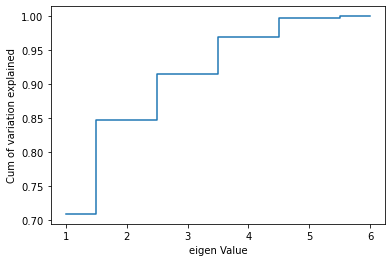

In [91]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Dimensionality Reduction

Now we are selecting 1 dimension only. With 1 variable we can explain over 72% of the variation in the original data!

In [92]:
pca1 = PCA(n_components=1)
pca1.fit(XScaled)
prediction=pca1.transform(XScaled)

#Append the prediction 
sportData["New Score"] = prediction
sportData.head(10)

Name   Runs    Ave      SR  Fours  Sixes   HF  New Score
1         CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0   8.516774
3        G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0   4.618340
5         V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0   4.142251
7         CL White  479.0  43.54  149.68   41.0   20.0  5.0   3.899411
9         S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0   4.120072
11       AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0   4.024436
13    KP Pietersen  305.0  61.00  147.34   22.0   20.0  3.0   2.879281
15       RG Sharma  433.0  30.92  126.60   39.0   18.0  5.0   2.919015
17  AB de Villiers  319.0  39.87  161.11   26.0   15.0  3.0   2.327389
19       JP Duminy  244.0  81.33  128.42   13.0   11.0  2.0   2.081642

In [93]:
sportData.sort_values(by="New Score",ascending=False)

Name   Runs    Ave      SR  Fours  Sixes   HF  New Score
1       CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0   8.516774
3      G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0   4.618340
5       V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0   4.142251
9       S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0   4.120072
11     AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0   4.024436
..           ...    ...    ...     ...    ...    ...  ...        ...
173   WD Parnell   19.0   4.75   70.37    2.0    0.0  0.0  -3.000751
171       Z Khan   12.0   6.00   70.58    1.0    0.0  0.0  -3.006639
175  PC Valthaty   30.0   5.00   58.82    4.0    0.0  0.0  -3.070959
177     RP Singh    6.0   3.00   50.00    0.0    0.0  0.0  -3.422022
179     R Sharma    2.0   0.50   18.18    0.0    0.0  0.0  -3.947402

[90 rows x 8 columns]

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Conclusion :
As per above data, we can say that - "CH Gayle" is on 1st Rank

# PART 5:

### 1. List down all possible dimensionality reduction techniques that can be implemented using python.



1 Missing Value Ratio

2 Low Variance Filter

3 High Correlation Filter

4 Random Forest

5 Backward Feature Elimination

6 Forward Feature Selection

7 Factor Analysis

8 Principal Component Analysis

9 Independent Component Analysis

10 Methods Based on Projections

11 t-Distributed Stochastic Neighbor Embedding (t-SNE)

12 UMAP

### 2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python.

Yes, we can use Dimensiinal Reduction on a multimedia data [images and video] and text data.

The image is a combination of pixels in rows placed one after another to form one single image each pixel value represents the intensity value of the image, so if you have multiple images we can form a matrix considering a row of pixels as a vector. It requires huge amounts of storage while working with many images where we are using PCA is used to compress it and preserve the data as much as possible.



#### Hands-on implementation of image compression using  PCA

(1090, 1500, 3)


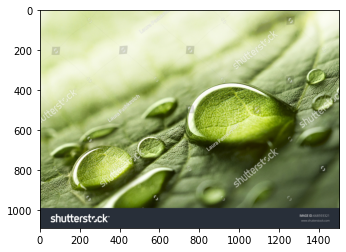

In [94]:
# Importing libraries
import matplotlib.image as mplib 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Reading an image and printing the shape of the image. 
img = mplib.imread('Nature.jpg')
print(img.shape)
plt.imshow(img)

(1090, 4500)


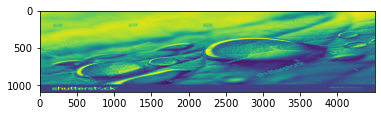

In [95]:
img_r = np.reshape(img, (1090,4500)) 
print(img_r.shape) 
plt.imshow(img_r)

(1090, 1000)
0.9999989473834967


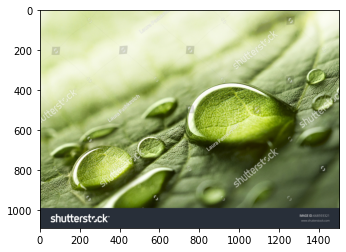

In [96]:
pca = PCA(1000)
img_transformed = pca.fit_transform(img_r) 
print(img_transformed.shape)
print(np.sum(pca.explained_variance_ratio_) )
plt.imshow(img)

# <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea">Thanks You !!!